In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from ast import literal_eval


df = pd.read_csv('reddit_intent_leads_scored_filtered.csv')
df

,author,subreddit,title,url,created_utc,intent_score,matched_keywords,score,comments_count
0,gzcl,Fitness,"the tom platz experience pain, pleasure, and h...",https://www.reddit.com/r/Fitness/comments/1953...,1.705088e+09,10.0,"['log', 'recommend', 'goal', 'replace', 'progr...",224,60
1,Known_Employer,SmallBusiness,a client wants me to quit my job and work for ...,https://www.reddit.com/r/smallbusiness/comment...,1.639775e+09,10.0,"['manage', 'operation', 'crm', 'team', 'system...",256,180
2,hucknuts,SmallBusiness,"own small flooring company, client ghosted me ...",https://www.reddit.com/r/smallbusiness/comment...,1.600525e+09,10.0,"['invoice', 'business', 'client', 'expensive']",269,132
3,MythicalStrength,Fitness,my guidereview for the most effective muscle g...,https://www.reddit.com/r/Fitness/comments/p10m...,1.628513e+09,10.0,"['plan', 'log', 'recommend', 'goal', 'replace'...",2135,432
4,letssail,SmallBusiness,silicon valley bank to donate all fees from pp...,https://www.reddit.com/r/smallbusiness/comment...,1.587998e+09,10.0,"['manage', 'team', 'system', 'business', 'clie...",265,11
...,...,...,...,...,...,...,...,...,...
1724,clankie,Notion,here are notions color codes,https://www.reddit.com/r/Notion/comments/n84y2...,1.620529e+09,3.0,['customize'],389,17
1725,Upmostduster,SmallBusiness,"youll find me doing any job in the company, bu...",https://www.reddit.com/r/smallbusiness/comment...,1.659528e+09,3.0,['operation'],267,214
1726,DaveYarnell,Fitness,today is ugovschwarzenegger s birthday!,https://www.reddit.com/r/Fitness/comments/1jby...,1.375163e+09,3.0,['reminder'],2987,701
1727,Antic_Opus,SmallBusiness,i just watched two parties in a negotiation le...,https://www.reddit.com/r/smallbusiness/comment...,1.690813e+09,3.0,['operation'],287,51


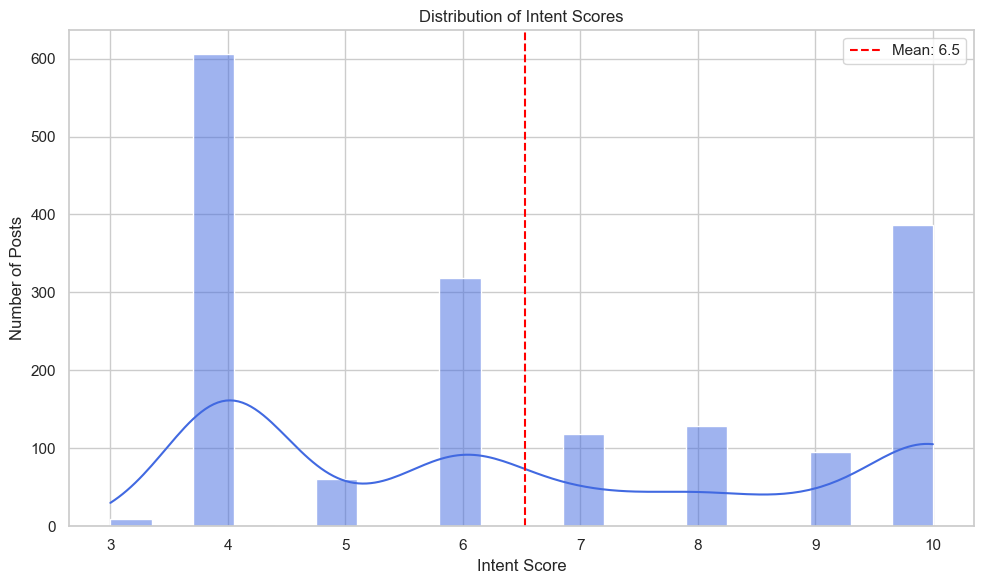

In [7]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='intent_score', bins=20, kde=True, color='royalblue')
plt.title('Distribution of Intent Scores')
plt.xlabel('Intent Score')
plt.ylabel('Number of Posts')
plt.axvline(df['intent_score'].mean(), color='red', linestyle='--', label=f'Mean: {df["intent_score"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.savefig('intent_score_distribution.png', dpi=300)
plt.show()


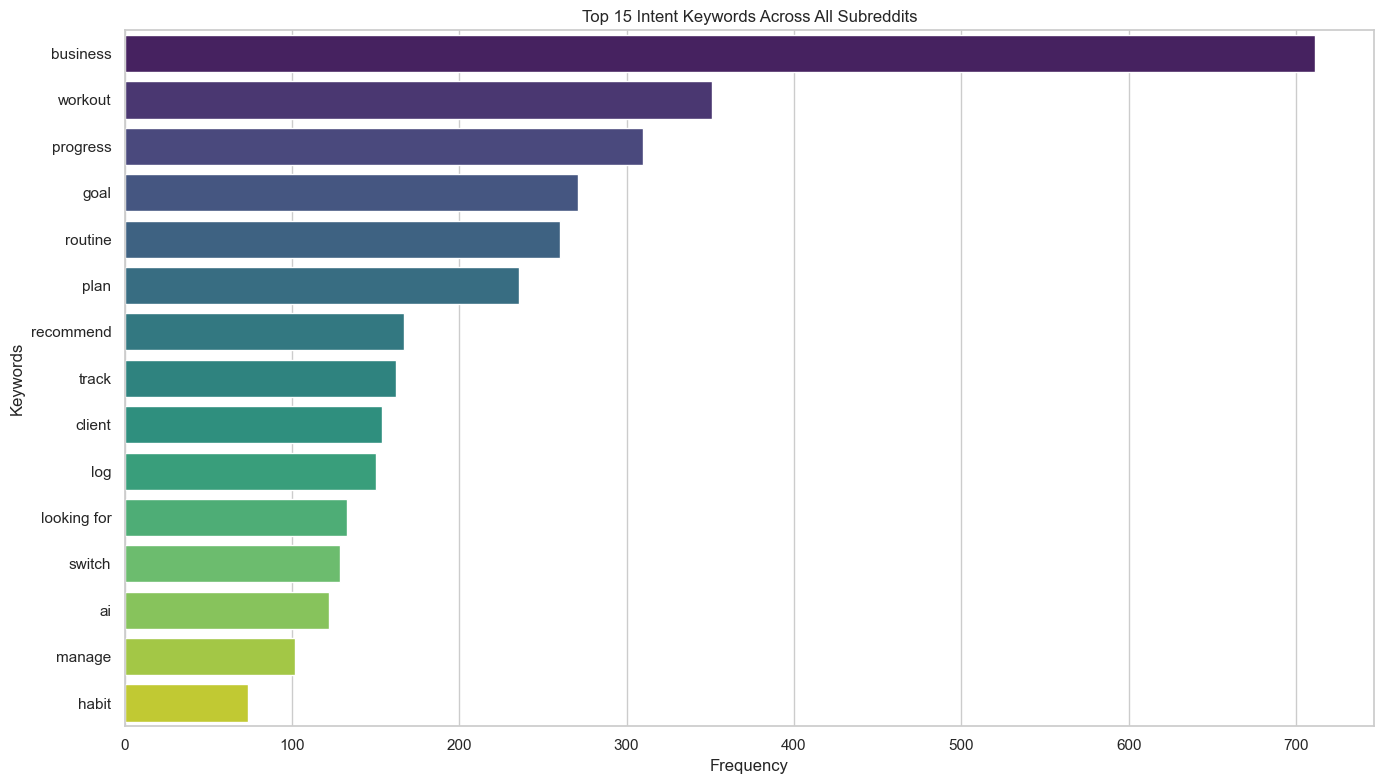

In [8]:
df['matched_keywords'] = df['matched_keywords'].apply(literal_eval)

keyword_df = df.explode('matched_keywords')

plt.figure(figsize=(14, 8))
top_keywords = keyword_df['matched_keywords'].value_counts().head(15)
sns.barplot(x=top_keywords.values, y=top_keywords.index, hue=top_keywords.index, palette='viridis', legend=False)
plt.title('Top 15 Intent Keywords Across All Subreddits')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.tight_layout()
plt.savefig('top_intent_keywords.png', dpi=300)
plt.show()

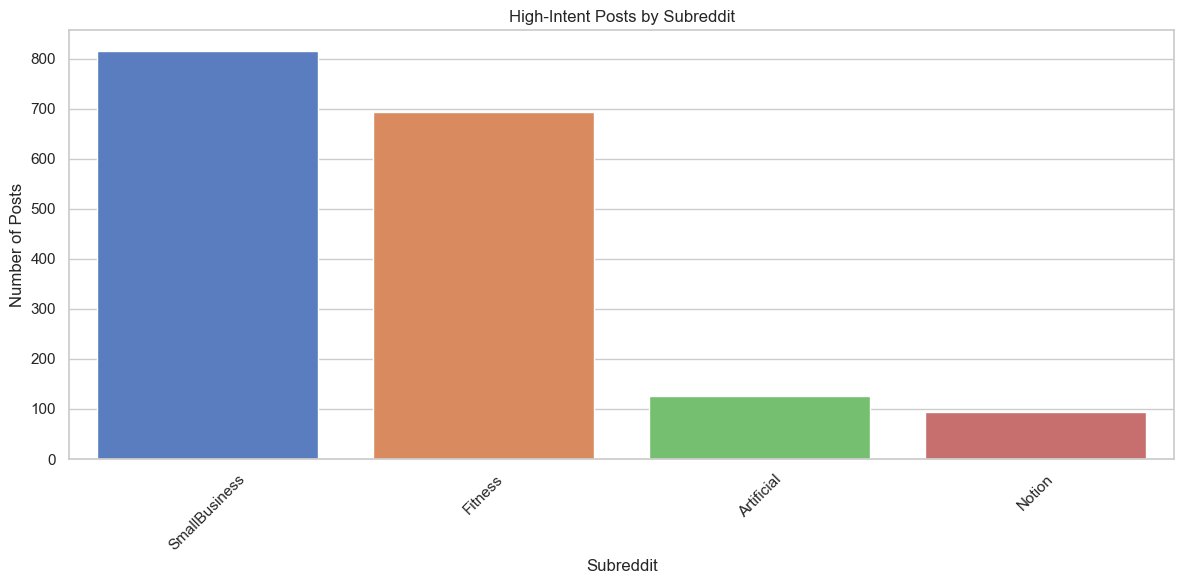

In [9]:
plt.figure(figsize=(12, 6))
subreddit_counts = df['subreddit'].value_counts()
sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values, hue=subreddit_counts.index, palette='muted', legend=False)
plt.title('High-Intent Posts by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('posts_by_subreddit.png', dpi=300)
plt.show()

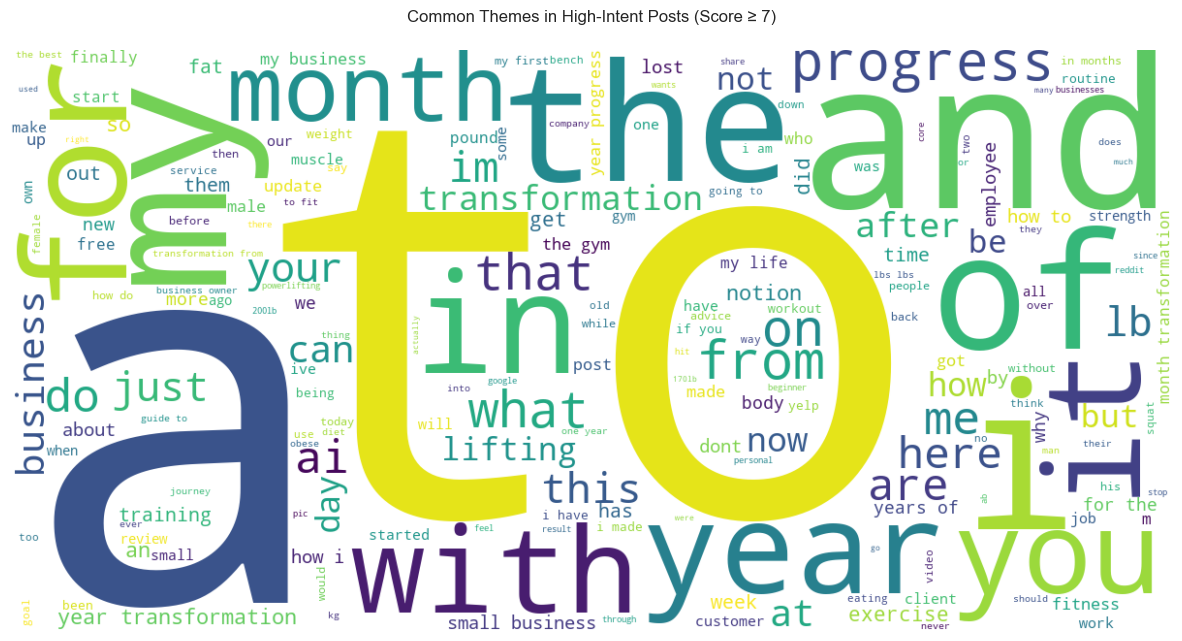

In [10]:
high_intent_text = ' '.join(df[df['intent_score'] >= 7]['title'].dropna().astype(str))

wordcloud = WordCloud(width=1200, height=600,
                     background_color='white',
                     colormap='viridis',
                     stopwords=['looking', 'want', 'need', 'like', 'tool', 'app']).generate(high_intent_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Themes in High-Intent Posts (Score ≥ 7)', pad=20)
plt.savefig('high_intent_wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()


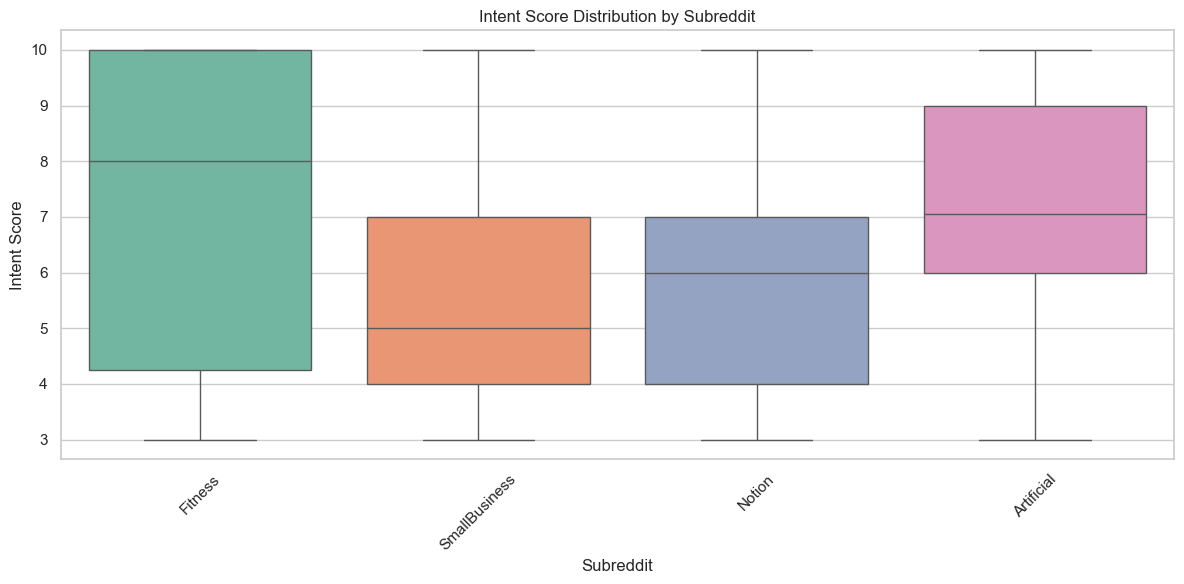

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='subreddit', y='intent_score', hue='subreddit', palette='Set2', legend=False)
plt.title('Intent Score Distribution by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Intent Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('intent_by_subreddit.png', dpi=300)
plt.show()

In [12]:
print("All visualizations saved as PNG files in your current directory!")

All visualizations saved as PNG files in your current directory!
